# Clasificacion Multiclase ($K \ge 3$)
Vamos a estudiar tres conceptos importantes.

* Softmax regression
* One-Hot-encoded
* One-vs-rest (one-vs-all).


Nota:
$$\exp(x) = \mathrm{e}^x $$
## Softmax regression:
Esta una funcion (activacion) de probabilidad que arroja $K$ resultados para $K$ clases.
Es una generalizacion de la logistic sigmoid $\sigma$

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)} \quad , \quad i=1,2, \cdots , K \quad , \quad z_i \in \mathbb{R}.
\end{eqnarray}
Esta funcion tiene la caracteristica de que es positiva con rango en $[0,1]$. Las commponentes $\sum_{i=1}^K \sigma(z_i)=1$


### Hipotesis

$$h(\theta , x ) =
\begin{pmatrix}
P( y=1 | x ; \theta)  \\
P( y=2 | x ; \theta)  \\
\vdots \\
P( y=K | x ; \theta)  \\
\end{pmatrix}
=
\begin{pmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\vdots \\
\sigma(z_K)
\end{pmatrix}
=
\frac{1}{\sum_{j=1}^K \exp({\theta^{(j)}}^T x)}
\begin{pmatrix}
\exp( {\theta^{(1)}}^T x ) \\
\exp( {\theta^{(2)}}^T x ) \\
\vdots \\
\exp( {\theta^{(K)}}^T x ) \\
\end{pmatrix}
 $$

donde $z^{(i)} = {\theta^{(i)}}^T x$.

### Funcion de costo.
Es como la de regresion logistica binaria pero hay mas de dos objetos.
El algoritmo para hallar la funcion de costo (tarea) es el mismo

* Escribir la probabilidad multidimensional para cada muestra.
* Usar el hecho de la indepenpendencia estadistica y escribir la probabilidad como una productoria de probabilidades. Esta productoria es doble. Por que es sobre los objetos (datos) y sobre las clases.  Esta es la funcion de "likelihood".

* Tomamos el logaritmo de esta funcion para convertir el producto en sumas.

* Cambiamos el signo de "+" a "-" para que la funcion se convexa y hallar el minimo.

El resultado es (tarea)
$$J(\theta) = -\left [
    \sum_{i=1}^m  \sum_{k=1}^K \mathbb{1} \\{ y^{(i)} = k \\}
    \log \frac{\exp ({\theta^{(k)}}^T x^{(i)})}{\sum_{j=1}^K
     \exp \left ( {\theta^{(i)}}^T x^{(i)}  \right ) }
       \right   ] $$

Donde la funcion indicadora $\mathbb{1}\{ . \}$
esta definida como

$$\mathcal{1} \{ x \} =
\begin{cases}
1 \quad   , \quad \text{si } x \text{   es verdad} \\
0 \quad   , \quad \text{si } x \text{  no  es verdad} \\
\end{cases} $$

Esta funcion tiene su gradiente (tarea)

$$\nabla_{\theta} J(\theta ) = - \sum_{i=1}^m
\left [ x^{(i)} \left ( \mathbb{1} \{ y^{(i)}=k  \}- p(y^{(i)}=k | x^{(i)} ; \theta)  \right )   \right ] $$


## One-hot-encoding
La idea es usar vectores base para cada clase. Es decir, si las clase son perro, gato , cerdo

$$y^{(1)} = (1, 0, 0)^T \text{ para perro} $$
$$y^{(2)} = (0, 1, 0)^T \text{ para gato} $$
$$y^{(3)} = (0, 0, 1)^T \text{ para cerdo} $$

En este caso

con $K=3$
$$X \Theta = Y $$
donde $X \in \mathbb{R}^{m \times n}$,
$\Theta \in \mathbb{R}^{n \times K}$,
$Y \in \mathbb{R}^{m \times K}$
En general podemos pensar en $K$ salidas en el sistema

$$X \Theta_j = Y_j \quad , \quad j=1, \cdots, K $$
donde $\Theta_j$ es la columna $j$ de la matriz $\Theta$.
cada funcion $h^{(i)}$ se mapea a traves de estas transformaciones.

## One-vs-all (uno versus el resto)
La idea es la siguiente. Tome las $K$ clases. las parte de la siguiente forma

* k=1, $2,3, \cdots, K$
Resuelva este probelma como dos clases $\{ 1 \}, \{2, 3, \cdots, K \} $

* $k=2$, $1, 3, \cdots, K$
Tenemos dos clases
$\{ 2 \}, \{1, 3, \cdots, K \}$

y asi sucesivamente

* $k=i$
$\{ i \}, \{1, 2,  \cdots, i-1, i+1, \cdots, K \}$

* $k=K$
$\{1, 2,  \cdots, K-1 \}, \{ k \}$
Veamos un ejemplo.



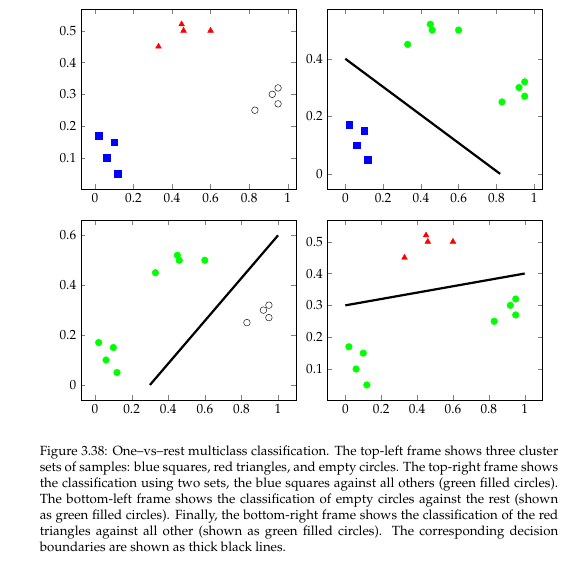

Los pasos son:

1. Asumimos que el objeto separado es los cuadrados azules y el resto.
El resto son los triangulos rojos y los circulos vacios. Se toma el resto como un bloque y resolvemos el problema de regresion logistica **binario**. Obtenemos una hipotesis $h^{(1)}(\theta, x)$. La frontera de decision esta marcada por la linea negra.

2. Asumimos que el objeto separado son los circulos vacios y el resto.  El resto son los triangulos rojos y los cuadrados  
azules. Se toma el resto como un bloque y resolvemos el problema de regresion logistica **binario**. Obtenemos una
hipotesis $h^{(2)}(\theta, x)$. La frontera de decision esta marcada por la linea negra.

3. Asumimos que el objeto separado son los triangulos rojos
 y el resto.  El resto son los cuadrados azules  rojos
 y los circulos vacios.
Se toma el resto como un bloque y resolvemos el problema de regresion logistica **binario**. Obtenemos una
hipotesis $h^{(3)}(\theta, x)$. La frontera de decision esta marcada por la linea negra.

Necesitamos la hipotesis final.

$$h(\theta, x) = \max_{i=1}^K h^{(i)}(\theta, x) $$





# Analisis de precision en los algoritmos.
No hemos discutido el control de calidad de los algortimos de clasificacion. Que tan bien se comportan?

## Matriz de confusion.
Veamos un ejemplo. Suponga que se va a hacer una prueba de embarazo a 1494 mujeres. Algunas seran positivas, otras negativas y pueden haber errores. Veamos un ejemplo de los resultados de las pruebas.

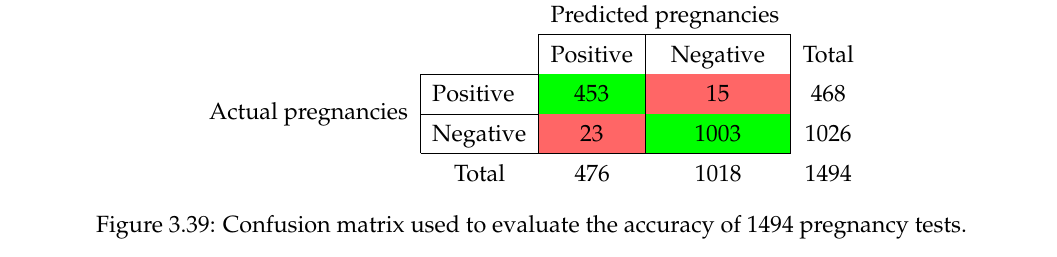

Mas generalmente

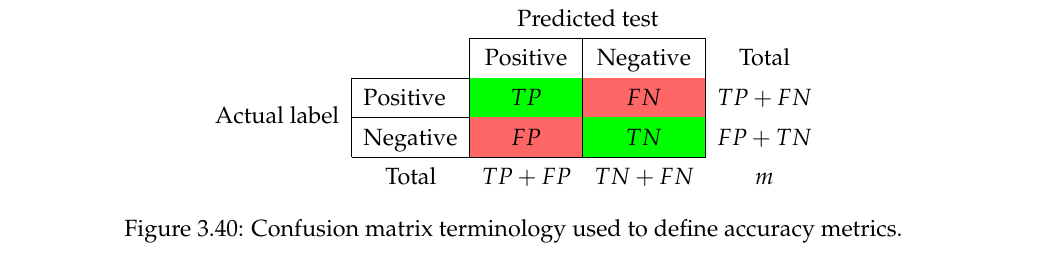



Primero

* $\ell_{11}=TP$:  **True positives**: La prueba salio positiva y es asi. No hay error.

* $\ell_{12}=FN$:  **False Negatives**: La prueba salio negativa pero es positiva.

* $\ell_{21}=FN$:  **False Positives**: La prueba salio positiva pero es negativa. Error

* $\ell_{22}=TN$:  **True Negatives**: La prueba salio negativa y  es negativa. No hay error.

Debemos definir **metricas** para estimar el error.

La primera medida es la suma de la diagonal sobre $m$

Exactitud
$$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{TP + TN}{m} $$

la **missclassification** (clasificacion errada) es el complemento

$$\text{missclassification} = \frac{FP + FN}{m} $$
Claramente missclassification $=1 - \text{accuracy}$.

Entender cada una de las componentes de la matriz de confusion es importante. Vamos a ver que el valor de estas componentes no es absoluto y depende de cada situacion. Con ejemplos ilustramos las dificultades de las componentes de la matriz.

**Ejemplo 3.3.1**: Un programita en `Python` para ilustrar como `sklearn` nos ayuda a determinar los valores $TP, TN, FP, FN$.
(mejor dicho la matriz de confusion).



In [1]:
from sklearn.metrics import confusion_matrix

y_true =[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred =[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f" tn={tn}, fp={fp}, fn={fn}, tp={tp}")
#

 tn=3, fp=3, fn=2, tp=4


**Ejemplo 3.3.2**: Vamos a estudiar resultados de examenes que predicen si un paciente tiene o no diabetes.
"+" es positivo para diabetes

* True Positive (TP): La prediccion es es "+" y en verdad tiene diabetes. El resultado es bueno (correcto) aunque para el paciente sean malas noticias.

* True Negative (TN): La prediccion es que el paciente es sano ("-") y es verdad. Maravilloso, el laboratorio y el paciente salen felices.

* False Positive (FP): La prediccion es que tiene diabetes "+" pero realmente es aliviado. Es malo que el laboratorio se equivocque y el paciente se restringe de ingerir alimentos con azucar. A veces una segunda opinion es importante.

* False Negative (FN): Este es grave. Por que dice que el paciente esta sano y no. Entonces seguira comienzo azucar y empeorando. Si cambia "diabetes" por "cancer" es peor.

Para este problema el FN es peor.

**Ejemplo 3.3.3** (Spam email): Un algoritmo detecta email basura (spam email). Necesitamos evaluar que bien se comporta.
Entonces las componentes de la matriz de confusion son

* True positive (TP): El email se va a la basura "+" y es basura. Bien por esa.

* True Negative (TN): El email se detecta como bueno y no se remueve. Buenas noticias.

* False Positive (FP): El email se detecta como "spam" pero no lo es. Grave. Imagine un cliente importante en la companhia mandando un nota de compra de un equipo. Su sistema ignora el mensaje y lo tira a la basura. Probablemente el jefe no va a estar muy contento. Este es el peor de los casos.

* False Negative (FN): El email se detecta como legitimo (bueno) pero es malo (spam). No hay problema, lo borra manualmente.
En este caso el FP es el peor.

**Ejemplo 3.3.4**: Una sola muestra $m=1$. Le llega un mensaje de que se gano la loteria pero tiene que dar su informacion bancaria para poder depositarle el dinero.
La situacion se describe en la Figura 3.41


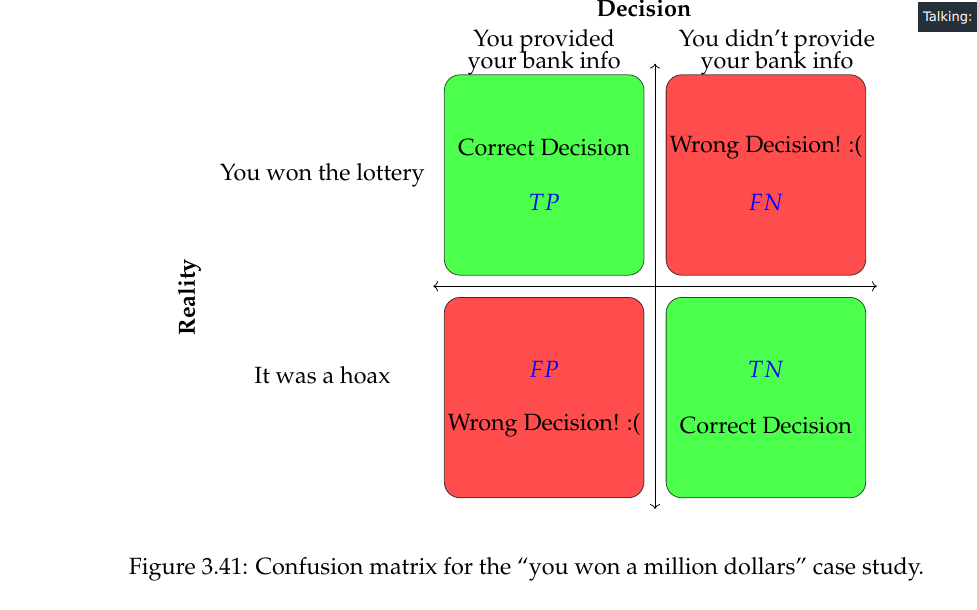

# Cuantificacion de la matriz de confusion. Metricas adicionales.
Tomemos el ejemplo de spam-email en la Figura 3.42

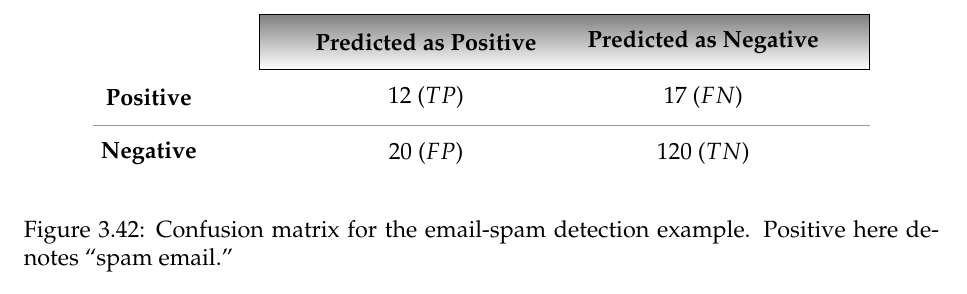

Veamos por que la metrica "accuracy" no es la mejor.

$$\text{accuracy} =  \frac{12 + 120 }{12 + 120 + 17 + 20}=0.781 \quad, (78 \%) $$

Veamos un caso mucho mas dramatico. Suponga que su predictor de spam email asume que todoas las muestras son negativas (todo sirve).

Veamos el ejemplo en la Figura 3.43.

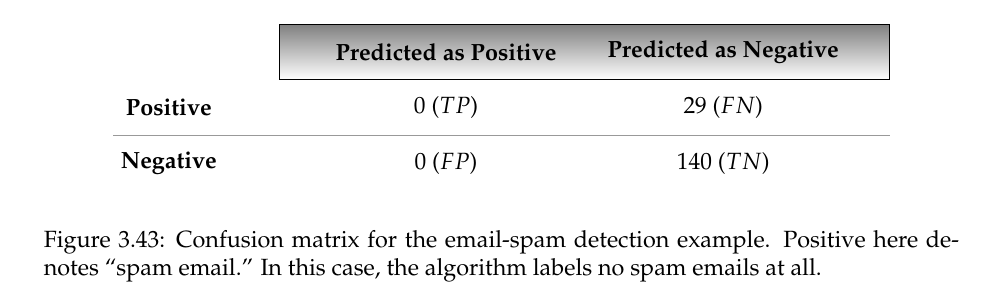

El accuracy en este caso es:
$$\text{accuracy} = \frac{140 + 0}{169} = 0.828 \quad , (82.8 \%) $$


82.8% es demasiado grande para un modelo tan limitado.
Necesitamos mas metricas.

* **Precision:** Esta metrica corresponde al la fraccion entre los TP contra todos los positivos


$$\text{precision} = \frac{TP}{TP + FP} $$
Veamos el ejemplo en la Figura 3.44

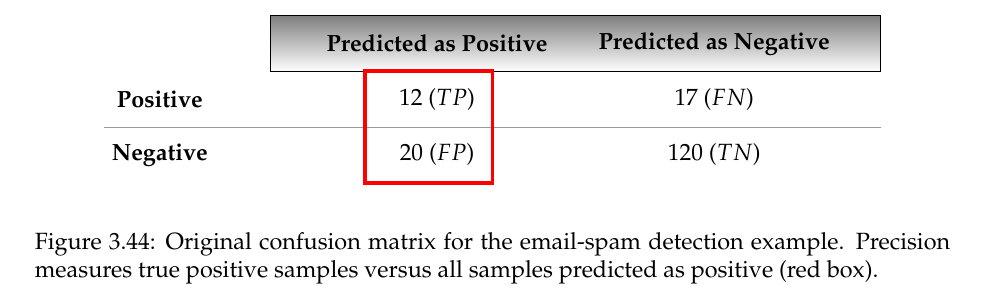

En este caso

$$\text{precision} = \frac{12}{32}=0.375 \quad, \quad (37.5\%) $$

* **Recall**: Esto mdie la cantidad de positivos predichos correctamente (TP) con respecto a todos los positivos $TP + FN$

$$\text{recall} = \frac{TP}{TP + FN} $$
Veamos el ejemplo de la Figura 3.45

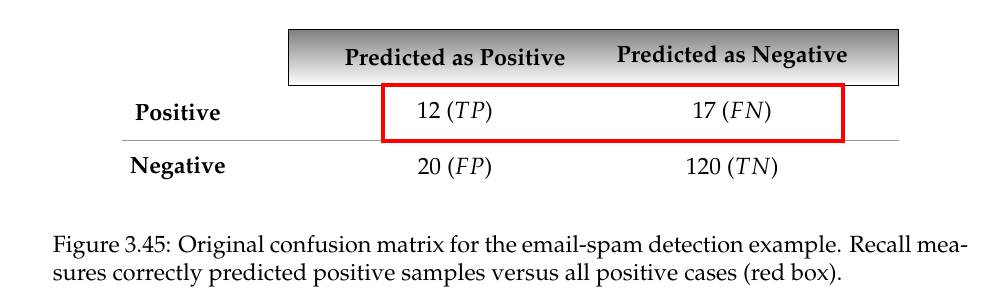

En este ejemplo

$$\text{recall} = \frac{12}{29} = 0.414 \quad, \quad (41.4\%) $$

Es interesante que si $FP=FN=0$
accuracy=precision=recall=1

Otros nombres para recall son **sensitivity** o **True Positive Rate**.


**Discusion**: Si comparamos precision $TP/(TP + FP)$ con recall $TP/(TP + FN)$ vamos que son practicamente iguales, salvo que la primera tiene $FP$ en el denominador donde la segunda tiene $FN$. Si $FP+PN$ es constantte encontes cuando sube la otra baja.
Son precisamente estas dos las que tienen mas o menos influencia en el caso del diagonostico de enfermedades (queremos  que FN se poco) o spam email o fraude bancario donde queremos que FP sea poco.

Como hay TPR (recall)

$$TPR = \frac{TP}{TP + FN} \tag{1} $$
hay tambien FPR

$$FPR = \frac{FP}{FP + TN} \tag{2} $$

* **F1 Score**: Como el precision y recall se complementan de cierta forma. Cuando son muy distintos se busca un promedio de los dos. El promedio mas conservador es el promedio armonico. Es el inverso del promedio de los inversos.

$$ \text{F1 score} = \left ( \frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2} \right )^{-1}  $$

Cuando las diferencias entre precision y recall sean grandes el F1 es buena alternativa.

**AUC-ROC**: AUC: Area under the curve, la curva es la ROC: Receiver Operator Characteristic.

[Wikipedia muestra una buena descripcion del ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).
### Construccion de la curva ROC

La curva ROC es una curva parametrica donde el parametro es $\gamma$. La construccion es en el plano cartesiano donde $x=TPR$, $y=FPR$  (ver Ecuaciones (1) y (2). )

$\text{ROC} [ x(\gamma) , y(\gamma)]$.

Veamos un ejemplo de como se construye la curva ROC.
Una cosa interesante es que esta curva muestra un **continuo** de posibilidades de umbrales $\gamma$.

Si $K>2$ se puede pensar en un conjunto de $K$ curvas ROC de uno contra el resto.

El ejemplo de la Figura 3.45 ilustra la construccion de una curva ROC.

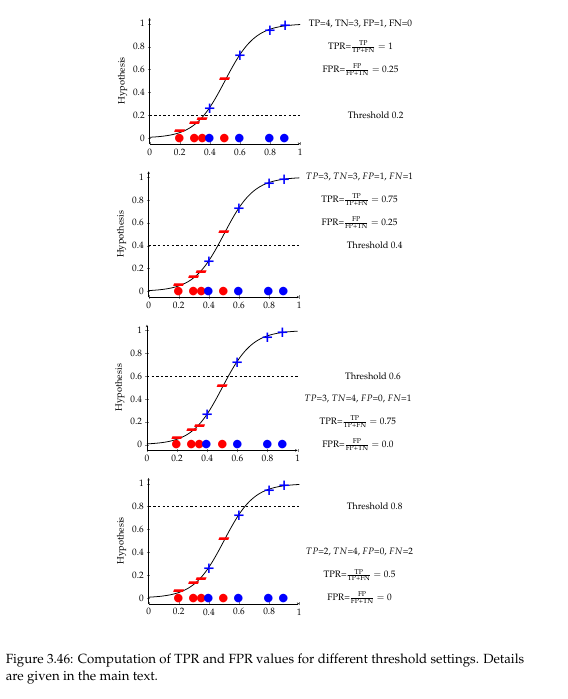

A los 4 puntos de arriba agregamos $\gamma=0$, $\gamma=1$.
Para $\gamma=0$ todos los positivos estan arriba y los negativos abajo.

$$TP=4, FP=4, TN=0, FN=0 $$

$$TPR = \frac{TP}{TP + FN} = 1 $$
$$FPR = \frac{FP}{FP + FN} = 1 $$

El otro caso es cuando $\gamma=1$. Todo esta por debajo, o sea que todos los positivos on 0


$$TP=0, TN=4, FP=0, FN=4 $$

$$TPR = \frac{TP}{TP + FN} = 0 $$
$$FPR = \frac{FP}{FP + FN} = 0 $$

Tenemos entonces los siguientes puntos para la curva ROC

$$(1,1), (0.25, 1), (0.25, 0.75), (0, 0.75), (0,0.5) , (0,0) $$
La grafica ROC se muestra a continuacion.

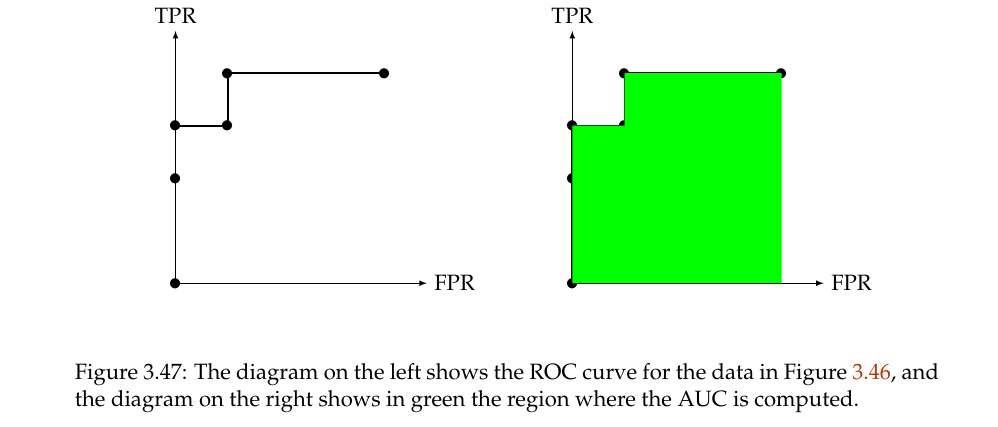

La explicacion de los puntos internos se dijo de forma oral. La parte izquierda de la Figura 3.47 muestra la curva ROC. La parte derecha muestra en verde el area bajo la curva.


$$AUC = 1 - (0.25)^2 = 0.9375 $$

Vamos a ver un ejemplo donde se calcula la ROC y la AUC en `python`.

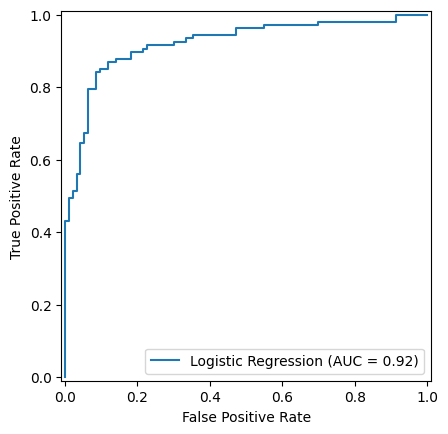

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a simple dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the data set into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a classifier (Logistic Regrestion in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# PLot the ROC curve using RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [5]:
# Let us compute the AUC
print(f'AUC = {roc_auc}')



AUC = 0.9216159179981912


Estudio de las medias Pitagoricas.
Las siguientes son las 4 medias Pitagoricas.
Asumamos dos valores $a,b > 0$.

1. **Media Aritmetica**:

$$A = \frac{a + b}{2} $$

2. **Media Geometrica**:
$$ G= \sqrt{a b} $$

3. **Root Mean Square**:
$$ Q = \sqrt{\frac{a^2 + b^2}{2}}$$

4. **Harmonic Mean**:
$$H = \frac{1}{\frac{\frac{1}{a} + \frac1b}{2}} $$

Estas medias se ilustran en la Figura 3.49

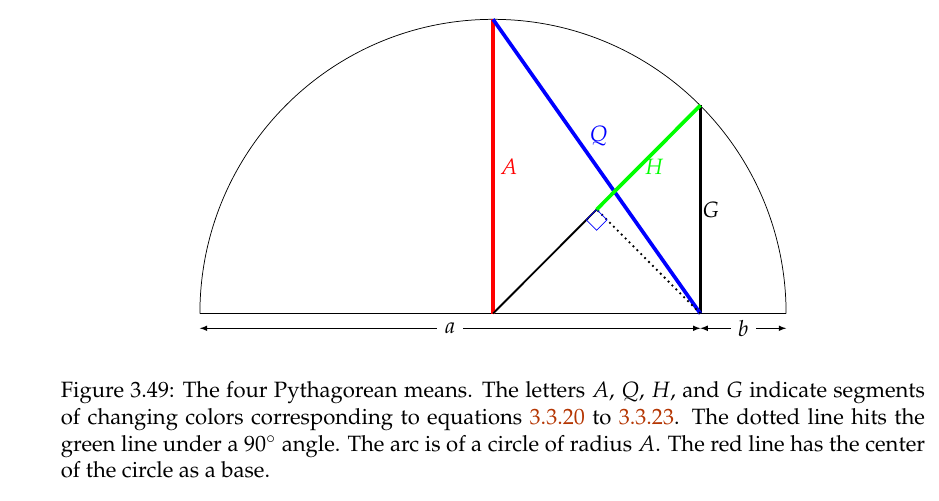

Tarea (probar las formulas de las medias de la Figura 3.49). Tambien probar que

* $H < G < A < Q $  si $a \ne b$
* $H=G=A=Q$ si $a = b$.
* Si one, $a$ o $b$ es 0. Por ejemplo si $a=0$, $A=a/2$, $Q=\sqrt{2}a$, $G=H=0$.

* Si $a=b=0$ no hay caso.

# Proxima clase: Redes Neuronales.